<a href="https://colab.research.google.com/github/enochlin8/Housing-Crisis/blob/main/Housing_Crisis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
filename = 'Housing price.csv'
dataframe = pd.read_csv(filename)

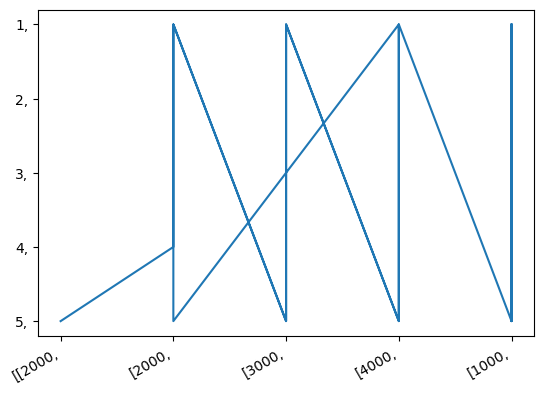

In [ ]:
fig, ax = plt.subplots()

ax.plot(dataframe["squarest"], dataframe["rooms"])
fig.autofmt_xdate()
fig.show()

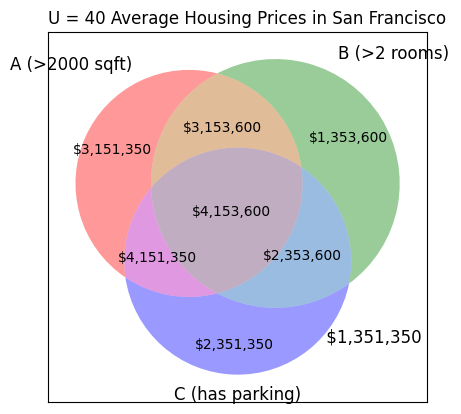

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Sample data
data = [
    [2000, 5, 1, 2804500], [2000, 4, 1, 2803600], [2000, 3, 1, 2802700], [2000, 2, 1, 2801800], [2000, 1, 1, 2800900],
    [3000, 5, 1, 3704500], [3000, 4, 1, 3703600], [3000, 3, 1, 3702700], [3000, 2, 1, 3701800], [3000, 1, 1, 3700900],
    [4000, 5, 1, 4604500], [4000, 4, 1, 4603600], [4000, 3, 1, 4602700], [4000, 2, 1, 4601800], [4000, 1, 1, 4600900],
    [2000, 5, 0, 1804500], [2000, 4, 0, 1803600], [2000, 3, 0, 1802700], [2000, 2, 0, 1801800], [2000, 1, 0, 1800900],
    [3000, 5, 0, 2704500], [3000, 4, 0, 2703600], [3000, 3, 0, 2702700], [3000, 2, 0, 2701800], [3000, 1, 0, 2700900],
    [4000, 5, 0, 3604500], [4000, 4, 0, 3603600], [4000, 3, 0, 3602700], [4000, 2, 0, 3601800], [4000, 1, 0, 3600900],
    [1000, 5, 1, 1904500], [1000, 4, 1, 1903600], [1000, 3, 1, 1902700], [1000, 2, 1, 1901800], [1000, 1, 1, 1900900],
    [1000, 5, 0, 904500], [1000, 4, 0, 903600], [1000, 3, 0, 902700], [1000, 2, 0, 901800], [1000, 1, 0, 900900]
]


# Set Requirements: {>2000 sqft}, Set B: {>2 rooms}, Set C: {has parking}
sets = {
    '100':set(),
    '010':set(),
    '001':set(),
    '110':set(),
    '101':set(),
    '011':set(),
    '111':set(),
    '000':set(),
}


for sq_ft, rooms, parking, price in data:
    in_A = sq_ft > 2000
    in_B = rooms > 2
    in_C = parking == 1

    key = f"{int(in_A)}{int(in_B)}{int(in_C)}"
    sets[key].add(price)

# Compute average prices for each Venn diagram sector
def avg_price(prices):
    return np.mean(list(prices)) if prices else 0

averages = {key: avg_price(prices) for key, prices in sets.items()}

# Create a Venn diagram based on the set sizes, excluding '000'
venn = venn3(subsets={key: len(prices) for key, prices in sets.items() if key != '000'}, set_labels=('A (>2000 sqft)', 'B (>2 rooms)', 'C (has parking)'))

# Add average prices to the labels, excluding '000'
for label, value in averages.items():
    if label != '000':  # Exclude '000' from the Venn diagram
        label_obj = venn.get_label_by_id(label)
        if label_obj:
            label_obj.set_text(f"${int(value):,}")

# Optionally, print the average for '000' (if relevant)
if '000' in averages:
    plt.text(0.5,-0.5, f" ${int(averages['000']):,}", fontsize = 12, ha='center')


# Show plot
plt.title("U = 40 Average Housing Prices in San Francisco ", loc ='left')
plt.axis('on')
plt.show()